## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Valentín Pertierra

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

In [3]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
from scipy.fftpack import fft

N  = 1000 # muestras
fs = 1000 # Hz

Funciones para implementar las ventanas:



In [4]:
""" 
Ventana de Bartlett
"""
def bartlett(L):
    
    N = L-1
    n = np.arange(0,N/2)
    
    W = 2*n/N
    
    if L%2:  #L es impar
        W = np.concatenate((W,2-2*np.arange((N+1)/2,(N+1))/(N+1)), axis=None)
    else:
        W = np.concatenate((W,W[::-1]), axis=None)

    return W

In [5]:
""" 
Ventana Hann
"""
def hann(N):
    
    if N%2:  #N es impar
        M = (N+1)/2
        n = np.arange(0,M)
        W = 0.5-0.5*np.cos(2*np.pi*n/(N-1))
        
        W = np.concatenate((W,W[-2::-1]), axis=None)
    else:
        M = N/2
        n = np.arange(0,M)
        W = 0.5-0.5*np.cos(2*np.pi*n/(N-1))
        
        W = np.concatenate((W,W[::-1]), axis=None)

    return W 

In [6]:
""" 
Ventana Blackman
"""
def blackman(N):
    
    
    if N%2:  #N es impar
        M = (N+1)/2
        n = np.arange(0,M)
        W = 0.42-0.5*np.cos(2*np.pi*n/(N-1))+0.08*np.cos(4*np.pi*n/(N-1))
        
        W = np.concatenate((W,W[-2::-1]), axis=None)
    else:
        M = N/2
        n = np.arange(0,M)
        W = 0.42-0.5*np.cos(2*np.pi*n/(N-1))+0.08*np.cos(4*np.pi*n/(N-1))
        
        W = np.concatenate((W,W[::-1]), axis=None)

    return W 

In [7]:
""" 
Ventana Flat-top
"""
def flatTop(N):
    
    a0 = 0.21557895
    a1 = 0.41663158
    a2 = 0.277263158
    a3 = 0.083578947
    a4 = 0.006947368
    
    if N%2:  #N es impar
        M = (N+1)/2
        n = np.arange(0,M)
        W = a0-a1*np.cos(2*np.pi*n/(N-1))+a2*np.cos(4*np.pi*n/(N-1))-a3*np.cos(6*np.pi*n/(N-1))+a4*np.cos(8*np.pi*n/(N-1))
        
        W = np.concatenate((W,W[-2::-1]), axis=None)
    else:
        M = N/2
        n = np.arange(0,M)
        W = a0-a1*np.cos(2*np.pi*n/(N-1))+a2*np.cos(4*np.pi*n/(N-1))-a3*np.cos(6*np.pi*n/(N-1))+a4*np.cos(8*np.pi*n/(N-1))
        
        W = np.concatenate((W,W[::-1]), axis=None)

    return W 

Funciones útiles:

In [8]:
""" 
brief:  Generador de señales senoidal, con argumentos
fs:     frecuencia de muestreo de la señal [Hz]
N:      cantidad de muestras de la señal a generar
f0:     frecuencia de la senoidal [Hz]
a0:     amplitud pico de la señal [V]
p0:     fase de la señal sinusoidal [rad]

como resultado la señal devuelve:

signal: senoidal evaluada en cada instante 
tt:     base de tiempo de la señal
"""
def generador_senoidal(fs, f0, N, a0=1, p0=0):
    
    # comienzo de la función
    # Genero un vector con el tiempo
    tt = np.linspace(0,(N-1)/fs,N)
    
    # Genero vector con los resultados
    signal = a0*np.sin(tt*2*np.pi*f0+p0)
        
    # fin de la función
    
    return tt, signal
    

In [68]:
# Funcion para generar el espectro de una señal
def analizadorEspectro(yt):

    #determino la cantidad de muestras de la señal (N)
    N = len(yt)

    # determino los valores de fecuencias normalizadas
    f = np.arange(N//2)/(N//2)

    #aplico la fft a la señal y la normalizo
    yf = fft(yt,N*4)*(2/N)

    #me quedo con la mitad de las muestras
    yf = yf[:N//2]
    
    return f,yf

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $

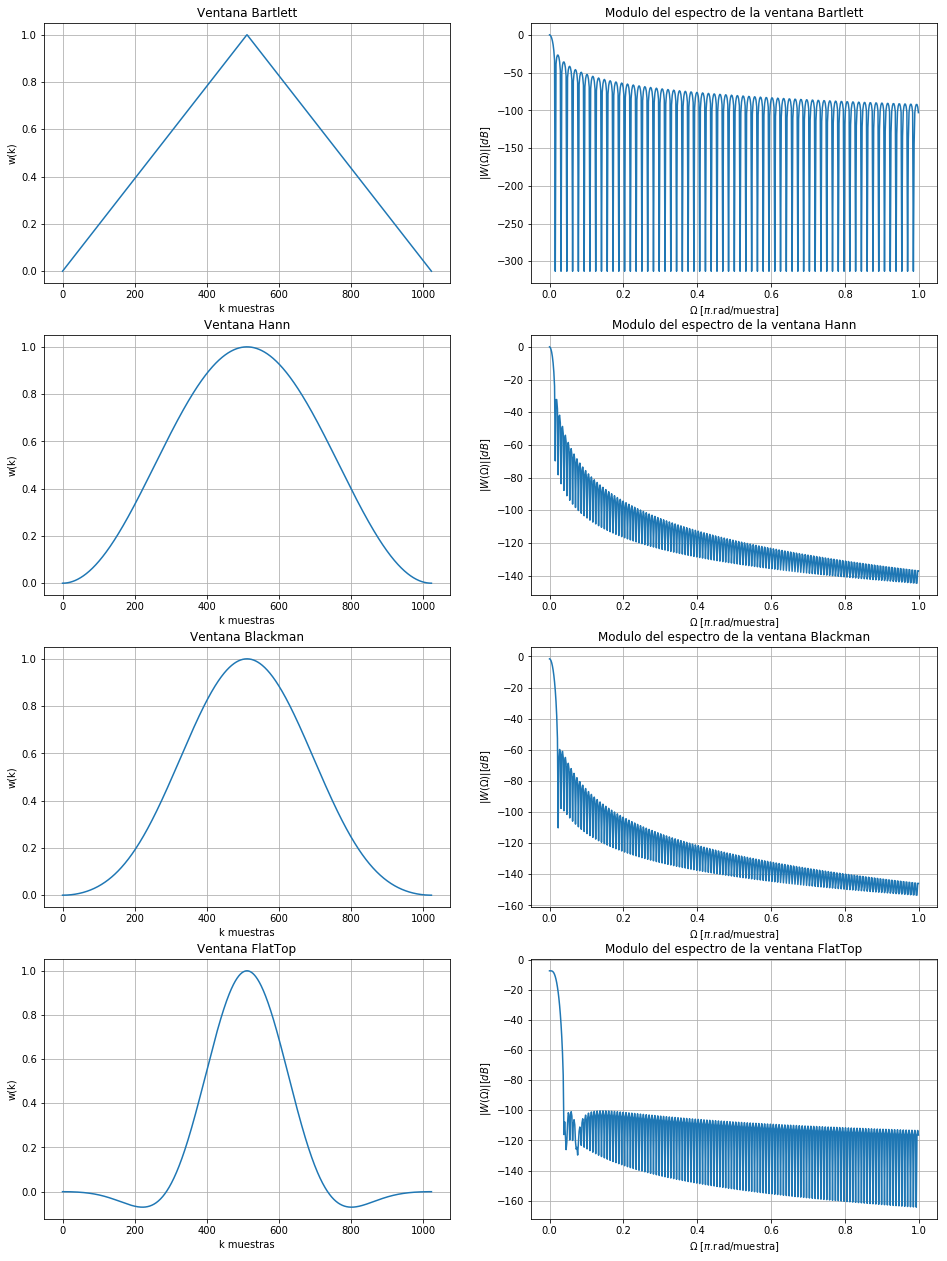

In [72]:
k = np.arange(0,N)

wBartlett = bartlett(N)
wHann = hann(N)
wBlackman = blackman(N)
wFlatTop = flatTop(N)

f,eBartlett = analizadorEspectro(wBartlett)
f,eHann = analizadorEspectro(wHann)
f,eBlackman = analizadorEspectro(wBlackman)
f,eFlatTop = analizadorEspectro(wFlatTop)

# Mínimo valor representable
lps = np.finfo('float').eps

# Grafico las ventanas con sus espectros
plt.figure(figsize=(16,22))
plt.subplot(421)
plt.title("Ventana Bartlett")
plt.plot(k, wBartlett)           
plt.xlabel('k muestras')
plt.ylabel('w(k)')
plt.grid(True)

plt.subplot(422)
plt.title("Modulo del espectro de la ventana Bartlett")
plt.plot(f, 20*np.log10(np.absolute(eBartlett)+lps))           
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$ |W(\Omega)| [dB] $')
plt.grid(True)

plt.subplot(423)
plt.title("Ventana Hann")
plt.plot(k, wHann)           
plt.xlabel('k muestras')
plt.ylabel('w(k)')
plt.grid(True)

plt.subplot(424)
plt.title("Modulo del espectro de la ventana Hann")
plt.plot(f, 20*np.log10(np.absolute(eHann)+lps))           
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$ |W(\Omega)| [dB] $')
plt.grid(True)

plt.subplot(425)
plt.title("Ventana Blackman")
plt.plot(k, wBlackman)           
plt.xlabel('k muestras')
plt.ylabel('w(k)')
plt.grid(True)

plt.subplot(426)
plt.title("Modulo del espectro de la ventana Blackman")
plt.plot(f, 20*np.log10(np.absolute(eBlackman)+lps))           
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$ |W(\Omega)| [dB] $')
plt.grid(True)

plt.subplot(427)
plt.title("Ventana FlatTop")
plt.plot(k, wFlatTop)           
plt.xlabel('k muestras')
plt.ylabel('w(k)')
plt.grid(True)

plt.subplot(428)
plt.title("Modulo del espectro de la ventana FlatTop")
plt.plot(f, 20*np.log10(np.absolute(eFlatTop)+lps))           
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$ |W(\Omega)| [dB] $')
plt.grid(True)

plt.show()

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [73]:
# Obtengo el espectro de la ventana rectangular 
f,eRect = analizadorEspectro(np.ones(N))
meRect = 20*np.log10(np.abs(eRect)+lps)

# Obtengo los módulos de los espectros en db 
meBartlett = 20*np.log10(np.abs(eBartlett)+lps)
meHann = 20*np.log10(np.abs(eHann)+lps)
meBlackman = 20*np.log10(np.abs(eBlackman)+lps)
meFlatTop = 20*np.log10(np.abs(eFlatTop)+lps)

# Determino la frecuencia a la que el módulo cae 3db
for i in range(len(meRect)):
    if meRect[i] <= meRect[0]-3:
        f0Rect = f[i]
        break
        
for i in range(len(meBartlett)):
    if meBartlett[i] <= meBartlett[0]-3:
        f0Bartlett = f[i]
        break

for i in range(len(meHann)):
    if meHann[i] <= meHann[0]-3:
        f0Hann = f[i]
        break
        
for i in range(len(meBlackman)):
    if meBlackman[i] <= meBlackman[0]-3:
        f0Blackman = f[i]
        break

for i in range(len(meFlatTop)):
    if meFlatTop[i] <= meFlatTop[0]-3:
        f0FlatTop = f[i]
        break

# Determino donde esta el primer crucue por cero
for i in range(len(meRect)):
    if meRect[i] < meRect[i+1]:
        fcRect = f[i]
        
        # Desde el cruce por cero determino el máximo valor del módulo
        RectMaxW2 = meRect[i:].max()
        break

for i in range(len(meBartlett)):
    if meBartlett[i] < meBartlett[i+1]:
        fcBartlett = f[i]
        
        # Desde el cruce por cero determino el máximo valor del módulo
        BartlettMaxW2 = meBartlett[i:].max()
        break

for i in range(len(meHann)):
    if meHann[i] < meHann[i+1]:
        fcHann = f[i]
        
        # Desde el cruce por cero determino el máximo valor del módulo
        HannMaxW2 = meHann[i:].max()
        break
        
for i in range(len(meBlackman)):
    if meBlackman[i] < meBlackman[i+1]:
        fcBlackman = f[i]
        
        # Desde el cruce por cero determino el máximo valor del módulo
        BlackmanMaxW2 = meBlackman[i:].max()
        break
        
for i in range(5,len(meFlatTop)):
    if meFlatTop[i] < meFlatTop[i+1]:
        fcFlatTop = f[i]
        
        # Desde el cruce por cero determino el máximo valor del módulo
        FlatTopMaxW2 = meFlatTop[i:].max()
        break

        
        
tus_resultados = [ 
                   [str(f0Rect), "%.2f"%RectMaxW2], # <-- acá debería haber numeritos :)
                   [str(f0Bartlett), "%.2f"%BartlettMaxW2], # <-- acá debería haber numeritos :)
                   [str(f0Hann), "%.2f"%HannMaxW2], # <-- acá debería haber numeritos :)
                   [str(f0Blackman), "%.2f"%BlackmanMaxW2], # <-- acá debería haber numeritos :)
                   [str(f0FlatTop), "%.2f"%FlatTopMaxW2] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,0.00390625,-7.44
Bartlett,0.005859375,-26.82
Hann,0.005859375,-32.21
Blackman,0.0078125,-59.78
Flat-top,0.015625,-100.33


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

In [36]:
# Funcion para generar el espectro de una señal
def analizadorEspectro(yt):

    #determino la cantidad de muestras de la señal (N)
    N = len(yt)

    # determino los valores de fecuencias normalizadas
    f = np.arange(N//2)/(N//2)

    #aplico la fft a la señal y la normalizo
    yf = fft(yt)*(2/N)

    #me quedo con la mitad de las muestras
    yf = yf[:N//2]
    
    return f,yf

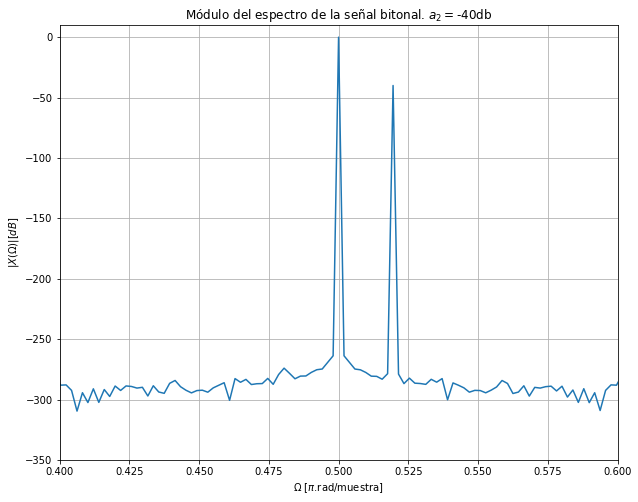

In [37]:
# Genero señales senoidales:
N = 1024
fs = 1000

# Parametros de la senoidal x1(k)
a01 = 1
p01 = 0
f01 = fs/4

# Parametros de la senoidal x2(k)
db = -40
a02 = a01*10**(db/20)
p02 = 0
f02 = f01+10*fs/N

# Genero las senoidales
tt1,x1 = generador_senoidal(fs,f01,N,a01,p01)
tt2,x2 = generador_senoidal(fs,f02,N,a02,p02)

signalx = x1+x2

# Obtengo el espectro
f,eSignalx = analizadorEspectro(signalx)

# Grafico el espectro
plt.figure(figsize=(10,8))
plt.title("Módulo del espectro de la señal bitonal. $a_2=$"+str(db)+"db")
plt.plot(f, 20*np.log10(np.abs(eSignalx)) )          
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.axis([0.4,0.6,-350,10])
plt.grid(True)



<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

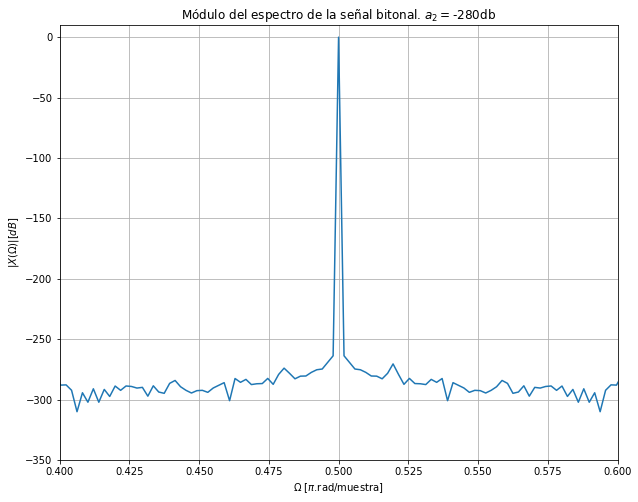

In [11]:
# Parametros de la senoidal x2(k)
db = -280
a02 = a01*10**(db/20)

# Vuelvo a generar la señal x2(k)
tt2,x2 = generador_senoidal(fs,f02,N,a02,p02)

signalx = x1+x2

# Obtengo el espectro
f,eSignalx = analizadorEspectro(signalx)

# Grafico el espectro
plt.figure(figsize=(10,8))
plt.title("Módulo del espectro de la señal bitonal. $a_2=$"+str(db)+"db")
plt.plot(f, 20*np.log10(np.abs(eSignalx)) )          
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.axis([0.4,0.6,-350,10])
plt.grid(True)





¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Gráficamente se puede evidenciar que el factor de escala mínimo  $a^0_2$ es de 280dB. Esto es producto de la representación numérica la cual impone este piso de ruido.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende de la representación numérica del simulador que estemos utilizando, en este caso Python. 
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

In [12]:
# Cuantizador de señales
'''
La señal de entrada tiene que estear entre (-1,1) y devuelve las cuentas esta entre (-2^(bits-1),2^(bits-1)-1)
'''
def cuantizador(signal,bits,redondeo):
    
    # Dermino el maximo valor de cuentas
    cuentas = 2**(b-1)-1
    
    # Escalo la señal
    signalQ = signal*cuentas
    
    # Redondeo
    if redondeo == "ROUND":
        signalQ = np.round(signalQ)
    if redondeo == "FLOOR":
        signalQ = np.floor(signalQ)
    if redondeo == "CEIL":
        signalQ = np.ceil(signalQ)
    
    return signalQ

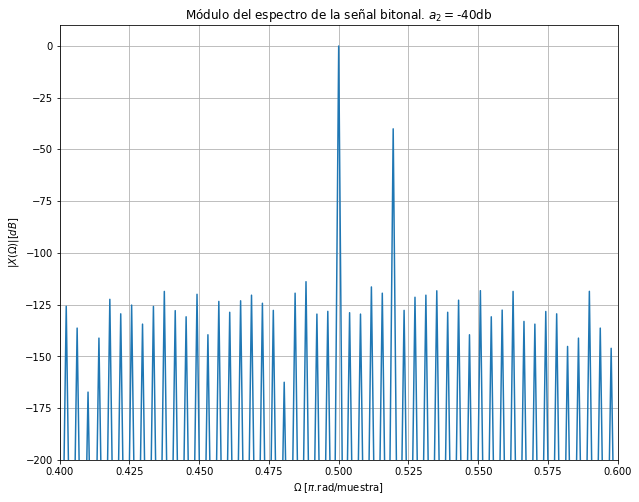

In [13]:
# Parametros de la senoidal x2(k)
db = -40
a02 = a01*10**(db/20)

# La cuantización en con 16btis
b = 16
cuentas = 2**(b-1)-1

# Vuelvo a generar la señal x2(k)
tt2,x2 = generador_senoidal(fs,f02,N,a02,p02)

signalx = x1+x2

# Normalizo las señal
signalx = signalx/np.amax(np.abs(signalx))

# Cuantizo la señal con 16bits
signalxQ = cuantizador(signalx,b,"ROUND")/cuentas

# Obtengo el espectro
f,eSignalxQ = analizadorEspectro(signalxQ)

# Grafico el espectro
plt.figure(figsize=(10,8))
plt.title("Módulo del espectro de la señal bitonal. $a_2=$"+str(db)+"db")
plt.plot(f, 20*np.log10(np.abs(eSignalxQ)+lps) )          
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.axis([0.4,0.6,-200,10])
plt.grid(True)




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso el piso de ruido esta impuesto por el ruido de cuantización, se puede ver graficamene que es de alrededor de -125db. De esta forma para poder evidenciar $x_2$ es necesario que su amplitud sea mayor a -125db respecto de la amplitud de $x_1$. 
</div>

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,54
moderada,29
máxima,36


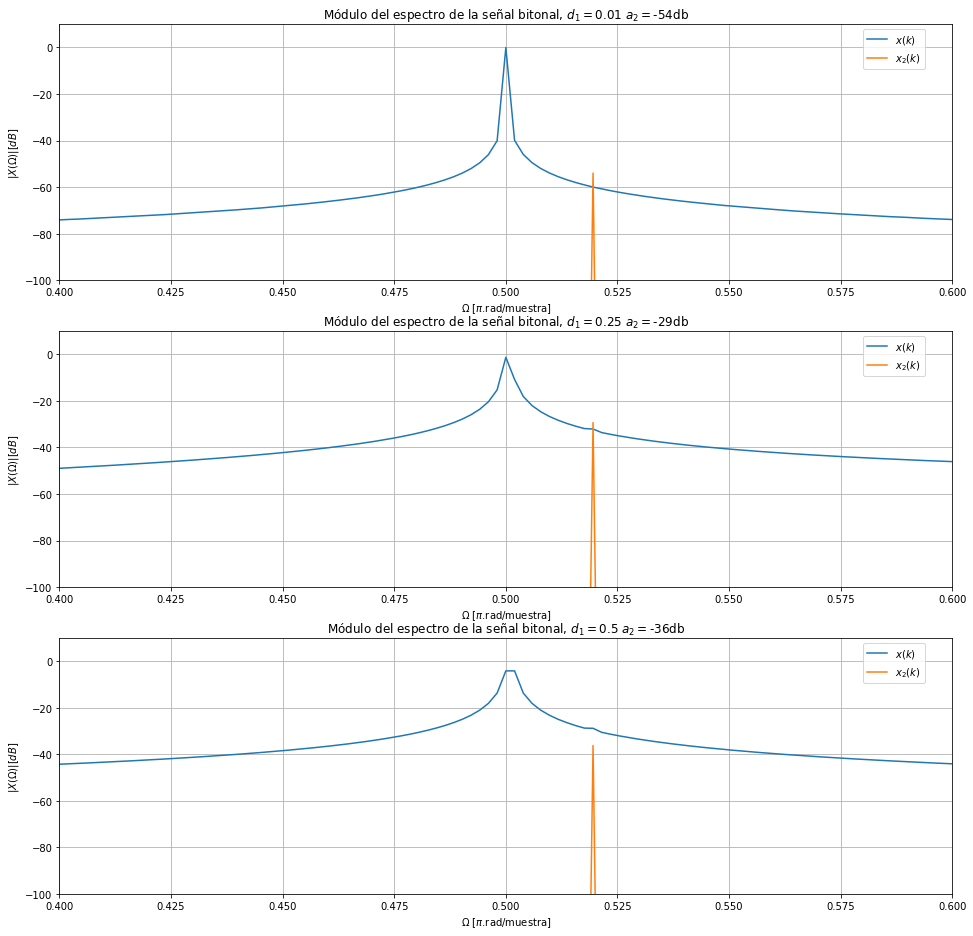

In [14]:
# Genero señales senoidales:
N = 1024
fs = 1000

# Parametros de la senoidal x1(k)
d1 = [0.01, 0.25, 0.5]

a01 = 1
p01 = 0

# Parametros de la senoidal x2(k)
db = [-54,-29,-36]
p02 = 0
f02 = fs/4+10*fs/N

# Parametros del cuantizador
bits = 16
cuentas = 2**(bits-1)-1

espectroXQ = []
espectroX2 = []

for i in range(len(d1)):
    
    f01 = fs/4+d1[i]*(fs/N)
    a02 = a01*10**(db[i]/20)
    
    # Genero las senoidales
    tt1,x1 = generador_senoidal(fs,f01,N,a01,p01)
    tt2,x2 = generador_senoidal(fs,f02,N,a02,p02)

    x = x1+x2

    # Normalizo la señal
    ampMax = np.amax(np.abs(x))
    x = x/ampMax

    # Agrego cuantizador
    xQ = cuantizador(x,bits,"ROUND")/cuentas
    
    # Obtengo el espectro
    f,exQ = analizadorEspectro(xQ)
    f,ex2 = analizadorEspectro(x2/ampMax)
    
    espectroXQ.append(exQ)
    espectroX2.append(ex2)


# Grafico el espectro
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title("Módulo del espectro de la señal bitonal, $d_1=$"+str(d1[0])+" $a_2=$"+str(db[0])+"db")
plt.plot(f, 20*np.log10(np.abs(espectroXQ[0])),label = "$x(k)$" )   
plt.plot(f, 20*np.log10(np.abs(espectroX2[0])),label = "$x_2(k)$" )  
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([0.4,0.6,-100,10])
plt.grid(True)

plt.subplot(312)
plt.title("Módulo del espectro de la señal bitonal, $d_1=$"+str(d1[1])+" $a_2=$"+str(db[1])+"db")
plt.plot(f, 20*np.log10(np.abs(espectroXQ[1])),label = "$x(k)$" ) 
plt.plot(f, 20*np.log10(np.abs(espectroX2[1])),label = "$x_2(k)$" )
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([0.4,0.6,-100,10])
plt.grid(True)

plt.subplot(313)
plt.title("Módulo del espectro de la señal bitonal, $d_1=$"+str(d1[2])+" $a_2=$"+str(db[2])+"db")
plt.plot(f, 20*np.log10(np.abs(espectroXQ[2])),label = "$x(k)$" )
plt.plot(f, 20*np.log10(np.abs(espectroX2[2])),label = "$x_2(k)$" )
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([0.4,0.6,-100,10])
plt.grid(True)



tus_resultados = [ 
                   -db[0], # <-- acá debería haber numeritos :)
                   -db[1], # <-- acá debería haber numeritos :)
                   -db[2] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

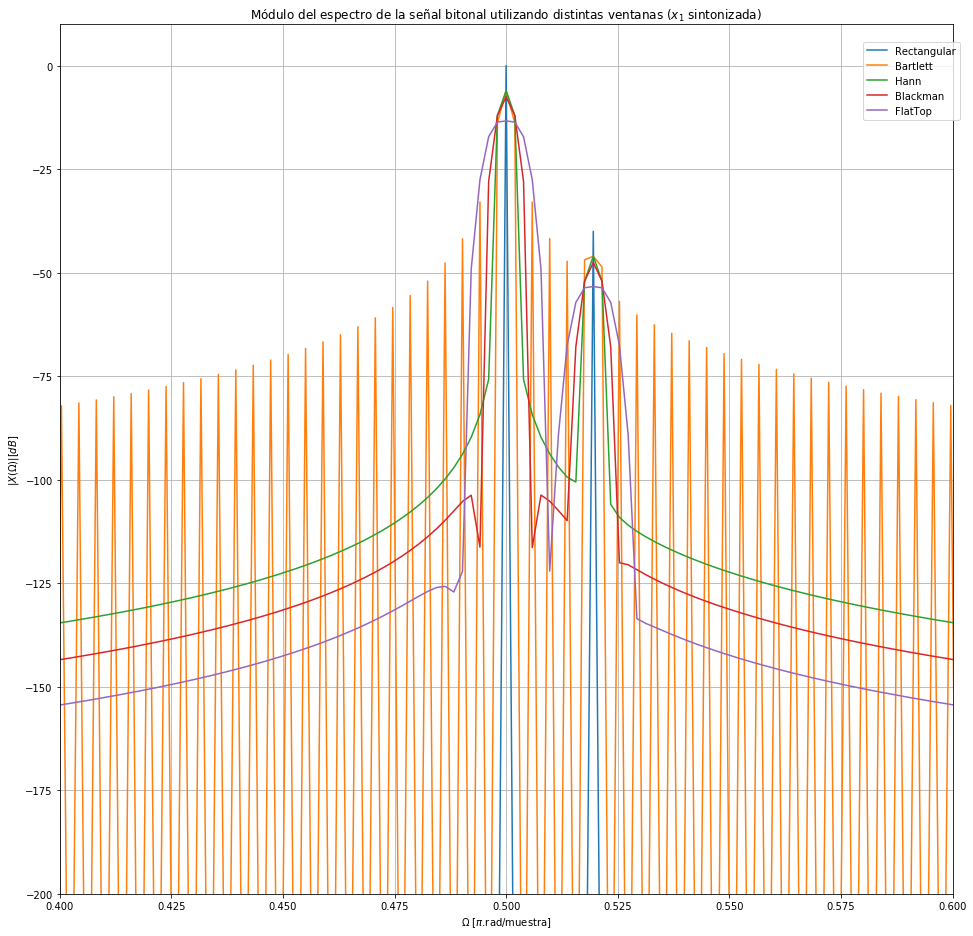

In [15]:
# Genero señales senoidales:
N = 1024
fs = 1000

# Parametros de la senoidal x1(k)
a01 = 1
p01 = 0
f01 = fs/4

# Parametros de la senoidal x2(k)
db = -40
a02 = a01*10**(db/20)
p02 = 0
f02 = f01+10*fs/N

# Genero las senoidales
tt1,x1 = generador_senoidal(fs,f01,N,a01,p01)
tt2,x2 = generador_senoidal(fs,f02,N,a02,p02)

x = x1+x2

# Genero las señales ventaneadas
wBartlett =x*bartlett(N)
wHann = x*hann(N)
wBlackman = x*blackman(N)
wFlatTop = x*flatTop(N)

# Obtengo el espectro de las señales
f,ex = analizadorEspectro(x)
f,eBartlett = analizadorEspectro(wBartlett)
f,eHann = analizadorEspectro(wHann)
f,eBlackman = analizadorEspectro(wBlackman)
f,eFlatTop = analizadorEspectro(wFlatTop)

# Grafico los espectros
plt.figure(figsize=(16,16))
plt.title("Módulo del espectro de la señal bitonal utilizando distintas ventanas ($x_1$ sintonizada)")
plt.plot(f, 20*np.log10(np.abs(ex)),label = "Rectangular" )   
plt.plot(f, 20*np.log10(np.abs(eBartlett)),label = "Bartlett" ) 
plt.plot(f, 20*np.log10(np.abs(eHann)),label = "Hann" ) 
plt.plot(f, 20*np.log10(np.abs(eBlackman)),label = "Blackman" ) 
plt.plot(f, 20*np.log10(np.abs(eFlatTop)),label = "FlatTop" ) 
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([0.4,0.6,-200,10])
plt.grid(True)



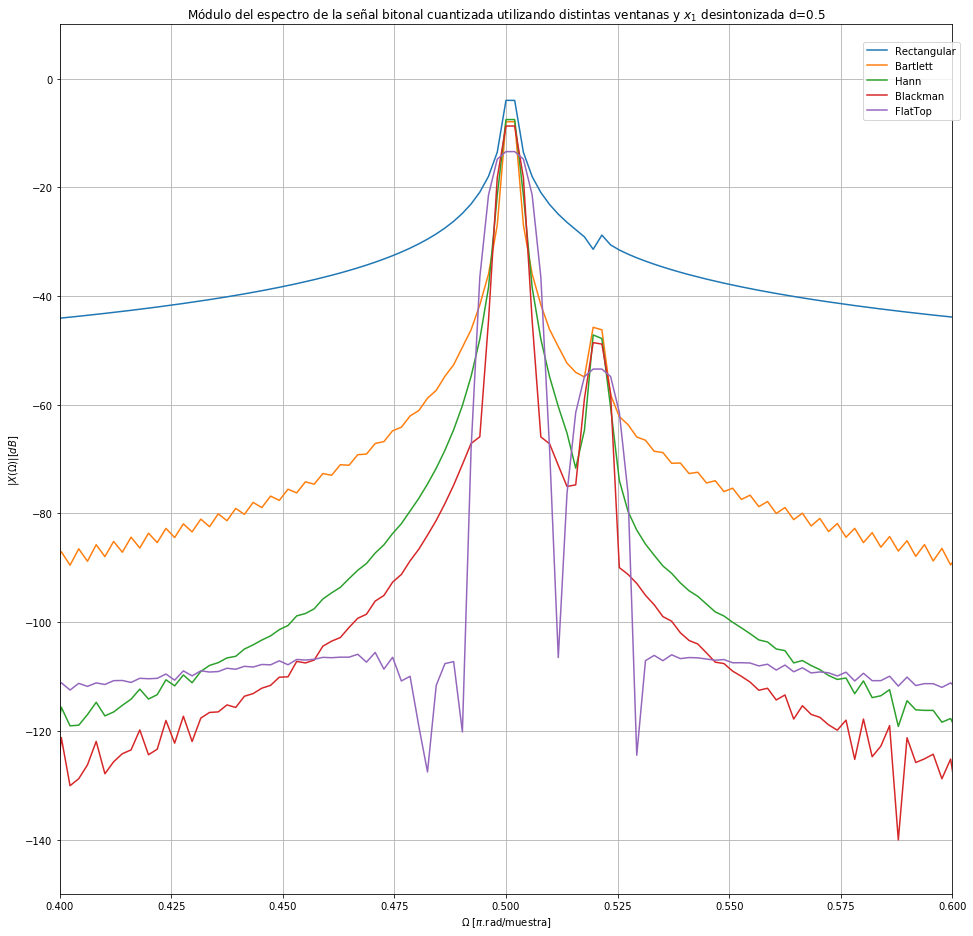

In [16]:
# Genero señales senoidales:
N = 1024
fs = 1000

# Parametros de la senoidal x1(k)
a01 = 1
p01 = 0
d1 = 0.5
f01 = fs/4+d1*(fs/N)

# Parametros de la senoidal x2(k)
db = -40
a02 = a01*10**(db/20)
p02 = 0
f02 = f01+10*fs/N

# Parametros cuantizador
bits = 16
cuentas = 2**(bits-1)-1

# Genero las senoidales
tt1,x1 = generador_senoidal(fs,f01,N,a01,p01)
tt2,x2 = generador_senoidal(fs,f02,N,a02,p02)

x = x1+x2

# Normalizo la señal 
x = x/np.amax(np.abs(x))

# Cuantizo la señal
x = cuantizador(x,bits,"ROUND")/cuentas
    
# Genero las señales ventaneadas
wBartlett =x*bartlett(N)
wHann = x*hann(N)
wBlackman = x*blackman(N)
wFlatTop = x*flatTop(N)

# Obtengo el espectro de las señales
f,ex = analizadorEspectro(x)
f,eBartlett = analizadorEspectro(wBartlett)
f,eHann = analizadorEspectro(wHann)
f,eBlackman = analizadorEspectro(wBlackman)
f,eFlatTop = analizadorEspectro(wFlatTop)

# Grafico los espectros
plt.figure(figsize=(16,16))
plt.title("Módulo del espectro de la señal bitonal cuantizada utilizando distintas ventanas y $x_1$ desintonizada d=0.5")
plt.plot(f, 20*np.log10(np.abs(ex)),label = "Rectangular" )   
plt.plot(f, 20*np.log10(np.abs(eBartlett)),label = "Bartlett" ) 
plt.plot(f, 20*np.log10(np.abs(eHann)),label = "Hann" ) 
plt.plot(f, 20*np.log10(np.abs(eBlackman)),label = "Blackman" ) 
plt.plot(f, 20*np.log10(np.abs(eFlatTop)),label = "FlatTop" ) 
plt.xlabel('$\Omega $ [$\pi $.rad/muestra]')
plt.ylabel('$|X(\Omega)| [dB]$')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([0.4,0.6,-150,10])
plt.grid(True)


In [17]:
# Los resultados los obtuve modificando a mano los valores de la atenuación de los script anterioriores 
tus_resultados = [ 
                   ['280', '50'], # <-- acá debería haber numeritos :)
                   ['43', '65'], # <-- acá debería haber numeritos :)
                   ['115', '75'], # <-- acá debería haber numeritos :)
                   ['123', '87'], # <-- acá debería haber numeritos :)
                   ['130', '95'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,280,50
Bartlett,43,65
Hann,115,75
Blackman,123,87
Flat-top,130,95


<div class="alert alert-block alert-warning">
Se puede observar que la utilización de la ventana rectangular (kernel de Dirichlet) es la que mejor nos permite discernir entre dos componentes cuando están sintonizadas con la frecuencia de muestreo $f_s$. En contra posición, apenas se desintoniza una componente y se genera desparramo espectral, el kernel de Dirichlet es el que presenta peores prestaciones.  
Por otro lado, la ventana flat top es la que mejores resultados presenta a la hora de detectar componentes de baja amplitud cuando hay desparramo espectral y ruido de cuantización.
</div>


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [18]:
# Los resultados los obtuve modificando a mano los valores de la frecuancia de x2 del script anterior
tus_resultados = [ 
                   '4·$2\pi$/N', # <-- acá debería haber numeritos :)
                   '4·$2\pi$/N', # <-- acá debería haber numeritos :)
                   '5·$2\pi$/N', # <-- acá debería haber numeritos :)
                   '2·$2\pi$/N', # <-- acá debería haber numeritos :)
                   '5·$2\pi$/N' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,4·$2\pi$/N
Bartlett,4·$2\pi$/N
Hann,5·$2\pi$/N
Blackman,2·$2\pi$/N
Flat-top,5·$2\pi$/N


<div class="alert alert-block alert-warning">
De esta comparación se puede concluir que la ventana Blackman es la que mejor nos permite discernir la frecuencia entre dos componentes ya que el desparramo energético en el entorno a ellas es menor en comparación con las otras ventanas. En contrapartida, las amplitudes de las componentes debe ser lo suficientemente grande como para superar el piso de ruido que impone la ventana Blackman.
</div>

<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [38]:
'''  
Función para generar ruido uniforme  
N: cantidad de muestras
fs: frecuencia de muestreo
low: limite inferior
high: limite superior

'''  
def genRuidoUniforme(low,high,N,fs):
    
    # Genero un vector con el tiempo
    t = np.linspace(0,(N-1)/fs,N)
    
    # Genero un vector con la señal aleatoria de Nx1
    y = np.random.uniform(low,high,N)
    
    return t,y

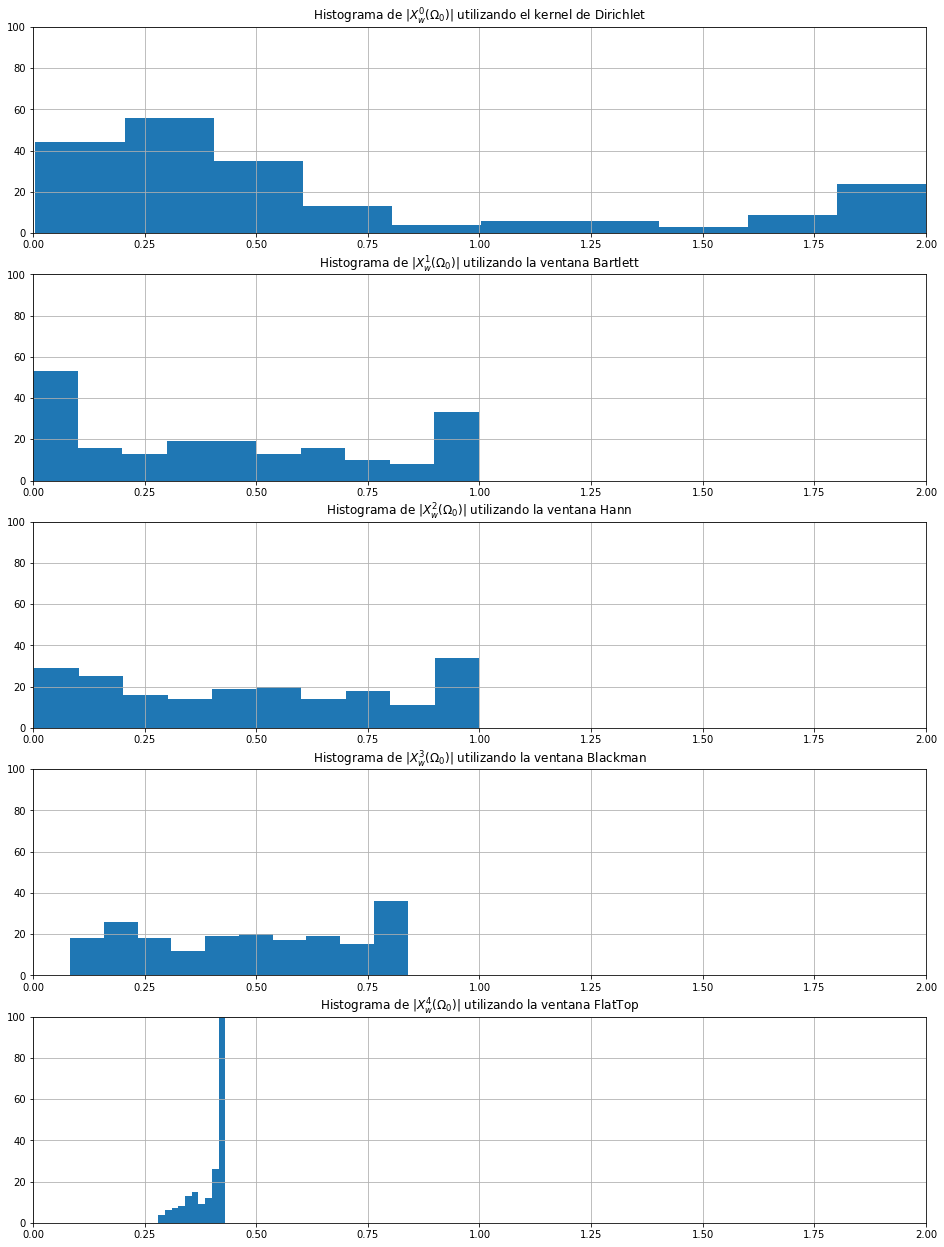

In [50]:
N = 1024
fs = 1000

realizaciones = 200

# Parametros de la señal
a0 = 2
p0 = 0
f0 = fs/4

# Variable aleatoria con distribución uniforme
variableAleatoria  = np.random.uniform(-2,2,realizaciones)

# Vectores donde guardo las distintas realizaciones
eDirichlet = []
eBartlett = []
eHann = []
eBlackman = []
eFlatTop = []

# Hago tantas realizaciones como variables aleatorias tenga
for fr in variableAleatoria:
    
    # Determino f1
    f1 = f0+fr*(fs/N)
    
    # Genero la señal senoidal
    tt,x = generador_senoidal(fs,f1,N,a0,p0)
    
    # Aplico las dstintas ventanas a la señal 
    wBartlett =x*bartlett(N)
    wHann = x*hann(N)
    wBlackman = x*blackman(N)
    wFlatTop = x*flatTop(N)

    # Obtengo el espectro de las señales
    f,ex = analizadorEspectro(x)
    f,eBa = analizadorEspectro(wBartlett)
    f,eH = analizadorEspectro(wHann)
    f,eBl = analizadorEspectro(wBlackman)
    f,eF = analizadorEspectro(wFlatTop)
    
    eDirichlet.append(ex)
    eBartlett.append(eBa)
    eHann.append(eH)
    eBlackman.append(eBl)
    eFlatTop.append(eF)
    

eDirichlet = np.array(eDirichlet)
eBartlett = np.array(eBartlett)
eHann = np.array(eHann)
eBlackman = np.array(eBlackman)
eFlatTop = np.array(eFlatTop)

# Genero un vector con los valores del estimador de a0 para las distintas señales
a0Dirichlet = np.abs(eDirichlet[:,N//4])
a0Bartlett = np.abs(eBartlett[:,N//4])
a0Hann = np.abs(eHann[:,N//4])
a0Blackman = np.abs(eBlackman[:,N//4])
a0FlatTop = np.abs(eFlatTop[:,N//4])
    

# Grafico los histogramas
plt.figure(figsize=(16,22))
plt.subplot(511)
plt.title("Histograma de |$X^0_w(\Omega_0)$| utilizando el kernel de Dirichlet")
plt.hist(a0Dirichlet, 10)
plt.axis([0,2,0,100])          
plt.grid(True)

plt.subplot(512)
plt.title("Histograma de |$X^1_w(\Omega_0)$| utilizando la ventana Bartlett")
plt.hist(a0Bartlett, 10)
plt.axis([0,2,0,100])          
plt.grid(True)

plt.subplot(513)
plt.title("Histograma de |$X^2_w(\Omega_0)$| utilizando la ventana Hann")
plt.hist(a0Hann, 10)
plt.axis([0,2,0,100])          
plt.grid(True)

plt.subplot(514)
plt.title("Histograma de |$X^3_w(\Omega_0)$| utilizando la ventana Blackman")
plt.hist(a0Blackman, 10)
plt.axis([0,2,0,100])          
plt.grid(True)

plt.subplot(515)
plt.title("Histograma de |$X^4_w(\Omega_0)$| utilizando la ventana FlatTop")
plt.hist(a0FlatTop, 10)
plt.axis([0,2,0,100])          
plt.grid(True)
    

In [52]:

a0 = 2
tus_resultados = []

# Determino el sesgo y la varianza
tus_resultados.append(["%.4f"%(np.mean(a0Dirichlet)-a0), "%.4f"%np.var(a0Dirichlet)])
tus_resultados.append(["%.4f"%(np.mean(a0Bartlett)-a0), "%.4f"%np.var(a0Bartlett)])
tus_resultados.append(["%.4f"%(np.mean(a0Hann)-a0), "%.4f"%np.var(a0Hann)])
tus_resultados.append(["%.4f"%(np.mean(a0Blackman)-a0), "%.4f"%np.var(a0Blackman)])
tus_resultados.append(["%.4f"%(np.mean(a0FlatTop)-a0), "%.4f"%np.var(a0FlatTop)])

# Me guardo los valores de las varianzas para comparar los distintos estimadores
varianza = [np.var(a0Dirichlet),np.var(a0Bartlett),np.var(a0Hann),np.var(a0Blackman),np.var(a0FlatTop)]

df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.3435,0.3925
Bartlett,-1.5655,0.1142
Hann,-1.5047,0.1041
Blackman,-1.5168,0.0565
Flat-top,-1.6038,0.0017


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

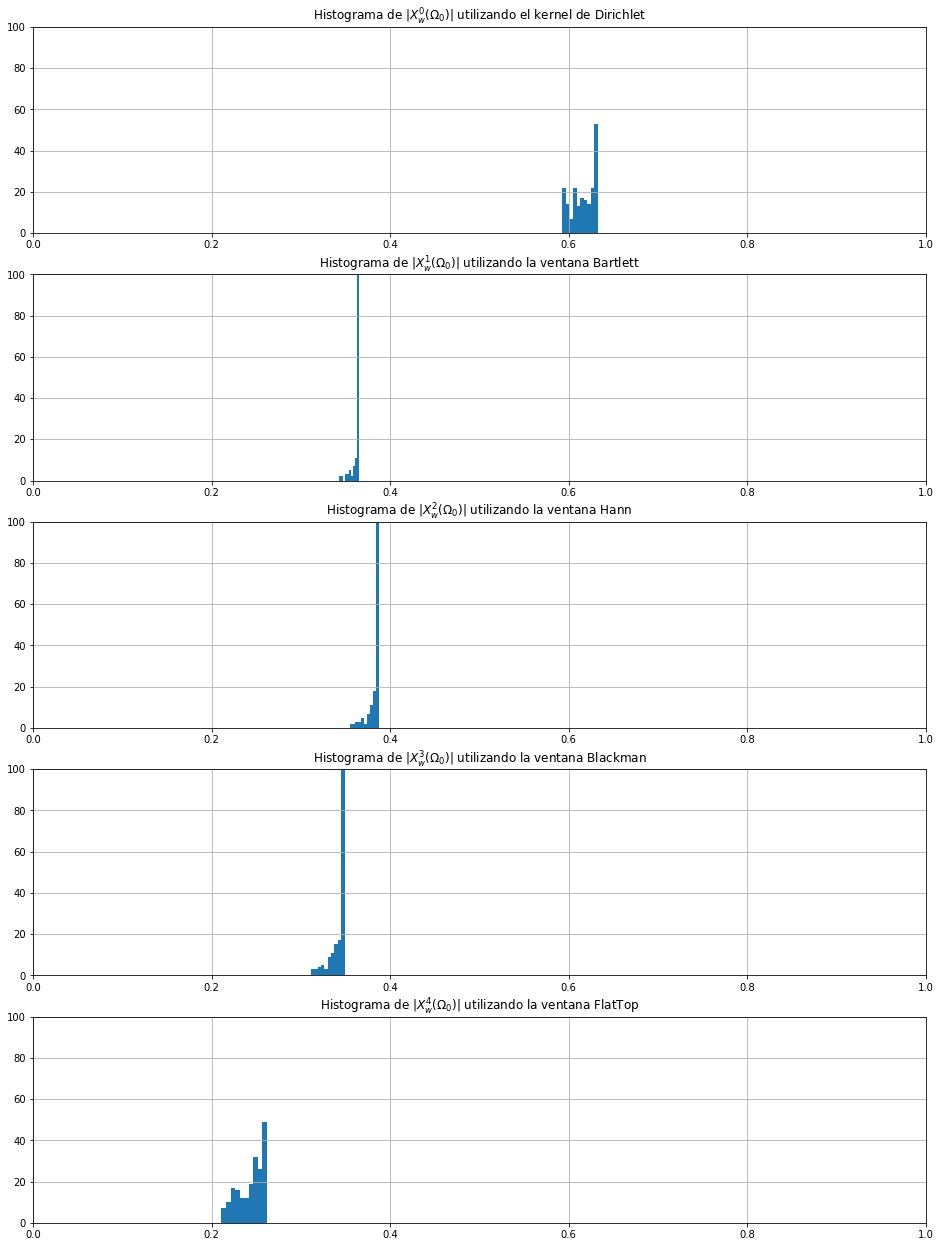

In [53]:
a = N//4-2
b = N//4+3


a0Dirichlet = np.abs(eDirichlet[:,a:b]/2)**2
a0Bartlett = np.abs(eBartlett[:,a:b]/2)**2
a0Hann = np.abs(eHann[:,a:b]/2)**2
a0Blackman = np.abs(eBlackman[:,a:b]/2)**2
a0FlatTop = np.abs(eFlatTop[:,a:b]/2)**2

a0Dirichlet = np.sqrt(np.sum(a0Dirichlet, axis=1)*(2/5))
a0Bartlett = np.sqrt(np.sum(a0Bartlett, axis=1)*(2/5))
a0Hann = np.sqrt(np.sum(a0Hann, axis=1)*(2/5))
a0Blackman = np.sqrt(np.sum(a0Blackman, axis=1)*(2/5))
a0FlatTop = np.sqrt(np.sum(a0FlatTop, axis=1)*(2/5))

plt.figure(figsize=(16,22))
plt.subplot(511)
plt.title("Histograma de |$X^0_w(\Omega_0)$| utilizando el kernel de Dirichlet")
plt.hist(a0Dirichlet, 10)
plt.axis([0,1,0,100])          
plt.grid(True)

plt.subplot(512)
plt.title("Histograma de |$X^1_w(\Omega_0)$| utilizando la ventana Bartlett")
plt.hist(a0Bartlett, 10)
plt.axis([0,1,0,100])          
plt.grid(True)

plt.subplot(513)
plt.title("Histograma de |$X^2_w(\Omega_0)$| utilizando la ventana Hann")
plt.hist(a0Hann, 10)
plt.axis([0,1,0,100])          
plt.grid(True)

plt.subplot(514)
plt.title("Histograma de |$X^3_w(\Omega_0)$| utilizando la ventana Blackman")
plt.hist(a0Blackman, 10)
plt.axis([0,1,0,100])          
plt.grid(True)

plt.subplot(515)
plt.title("Histograma de |$X^4_w(\Omega_0)$| utilizando la ventana FlatTop")
plt.hist(a0FlatTop, 10)
plt.axis([0,1,0,100])          
plt.grid(True)


In [65]:

a0 = np.sqrt(2)
tus_resultados = []


# Determino el sesgo y la varianza
tus_resultados.append(["%.4f"%(np.mean(a0Dirichlet)-a0), "%.8f"%np.var(a0Dirichlet),"-%.f "%(100*varianza[0]/np.var(a0Dirichlet))])
tus_resultados.append(["%.4f"%(np.mean(a0Bartlett)-a0), "%.8f"%np.var(a0Bartlett),"-%.f "%(100*varianza[1]/np.var(a0Bartlett))])
tus_resultados.append(["%.4f"%(np.mean(a0Hann)-a0), "%.8f"%np.var(a0Hann),"-%.f "%(100*varianza[2]/np.var(a0Hann))])
tus_resultados.append(["%.4f"%(np.mean(a0Blackman)-a0), "%.8f"%np.var(a0Blackman),"-%.f "%(100*varianza[3]/np.var(a0Blackman))])
tus_resultados.append(["%.4f"%(np.mean(a0FlatTop)-a0), "%.8f"%np.var(a0FlatTop),"-%.f "%(100*varianza[4]/np.var(a0FlatTop))])


df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$','Diferencia de $v_{a1}$ [%]'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$,Diferencia de $v_{a1}$ [%]
Rectangular,-0.7979,0.00017158,-228755
Bartlett,-1.0513,0.00001587,-720027
Hann,-1.0305,0.00004369,-238312
Blackman,-1.0709,0.00007452,-75846
Flat-top,-1.1700,0.00021041,-790


<div class="alert alert-block alert-warning">
Si bien los sesgos varían según que ventana y estimador se utilicen, se puede observar que el estimador considerando varias muestras reduce considerablemente la varianza respecto al estimador considerando un solo punto.   
En todos los casos se puede corregir el sesgo del estimador por medio de la suma de una constante ya que este es un error sistemático.  Del mismo modo se puede modificar la escala multiplicando al estimador por una constante, pero en todos los casos la varianza se mantiene igual.
</div>